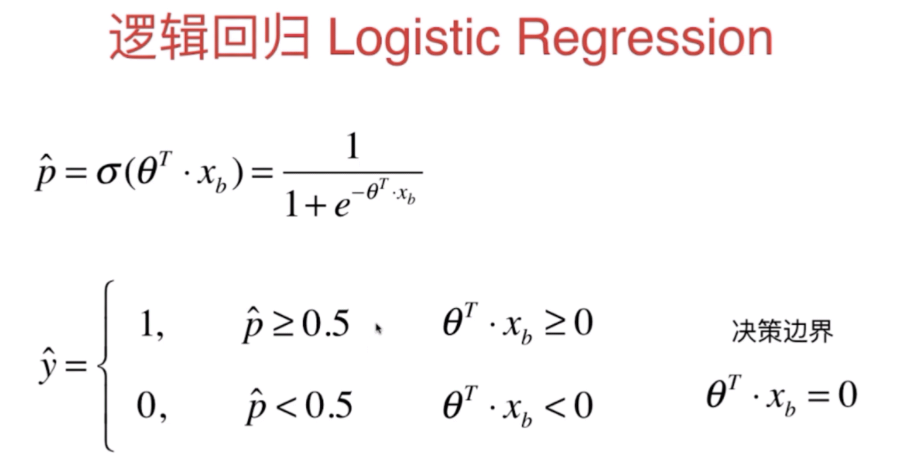

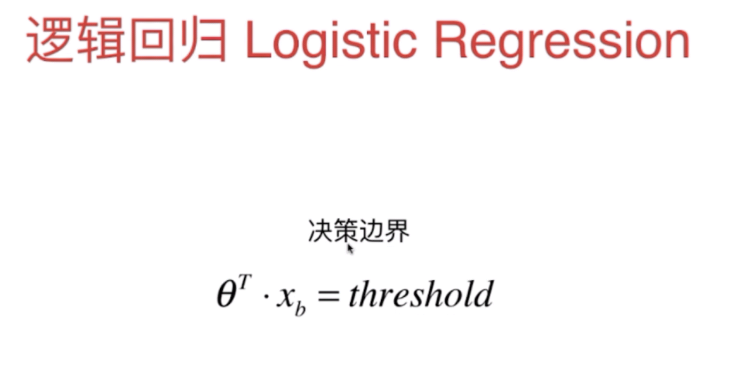

# 不同的阈值，影响精准率和召回率

> ⭕️代表 0，🌟代表 1，初始阈值为0
> 选择不同的阈值，影响精准率和召回率


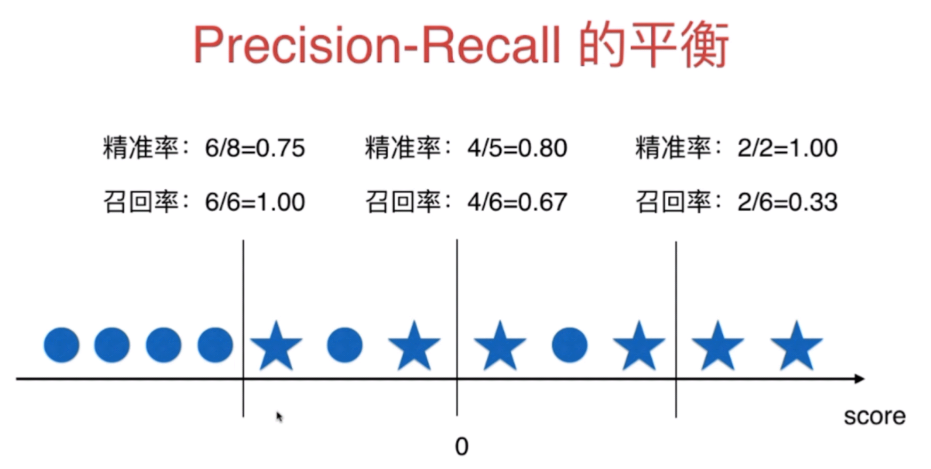

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9755555555555555

In [32]:
y_log_predict = log_reg.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [34]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.9473684210526315

In [35]:
from sklearn.metrics import recall_score
recall_score(y_test, y_log_predict)

0.8

In [36]:
from sklearn.metrics import f1_score

f1_score(y_test, y_log_predict)

0.8674698795180723

In [37]:
log_reg.decision_function(X_test)

array([-22.05698589, -33.02949665, -16.21341955, -80.37931601,
       -48.25126857, -24.54014646, -44.39166413, -25.04311597,
        -0.97826126, -19.71755219, -66.25139799, -51.09623997,
       -31.49354614, -46.05326229, -38.67895394, -29.80477586,
       -37.58862052, -82.57577675, -37.81918023, -11.01164935,
        -9.17442242, -85.13010877, -16.7160194 , -46.23741901,
        -5.33006727, -47.91761476, -11.66739676, -39.19652278,
       -25.25305857, -14.36644005, -16.99796104, -28.91921328,
       -34.33960347, -29.47652857,  -7.85813437,  -3.82075721,
       -24.08201266, -22.16361327, -33.61246921, -23.14033731,
       -26.91819292, -62.38951819, -38.85711989, -66.77274765,
       -20.14486041, -17.47889594, -18.06800899, -22.2224127 ,
       -29.6231922 , -19.73166698,   1.49550639,   8.32091708,
       -36.29353712, -42.5074497 , -25.90456152, -34.98974868,
        -8.42027882, -50.04739452, -51.48219012,  19.88976117,
        -8.91891728, -31.9935679 , -11.66117027,  -0.47

In [38]:
log_reg.decision_function(X_test)[:10]

array([-22.05698589, -33.02949665, -16.21341955, -80.37931601,
       -48.25126857, -24.54014646, -44.39166413, -25.04311597,
        -0.97826126, -19.71755219])

In [39]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
decision_scores = log_reg.decision_function(X_test)

In [41]:
np.min(decision_scores)

-85.68621248684077

In [54]:
np.max(decision_scores)

19.88976117410053

### scikit learn 在predict方法里面没有设置阈值这个方法，通过另外一个方式实现
* 通过对decision_function 分数值的选取，反推分类，比如：选择阈值为5，大于5的分数值，分类为“1”

In [43]:
y_predict_2 = np.array(decision_scores >= 5, dtype='int' )

In [44]:
y_predict_2[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
confusion_matrix(y_test, y_predict_2)

array([[404,   1],
       [ 21,  24]])

In [46]:
precision_score(y_test, y_predict_2)

0.96

In [47]:
recall_score(y_test, y_predict_2)

0.5333333333333333

In [55]:
y_predict_3 = np.array(decision_scores >= -5, dtype='int' ) #选择阈值为-5

In [50]:
confusion_matrix(y_test, y_predict_3)

array([[390,  15],
       [  5,  40]])

In [52]:
precision_score(y_test, y_predict_3)

0.7272727272727273

In [53]:
recall_score(y_test, y_predict_3)

0.8888888888888888